In [26]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
sns.set()
# statsmodels

In [27]:
# leyendo el archivo vuelos_por_dia.csv y darle nombre de columna Fecha y Vuelos
vuelos = pd.read_csv('vuelos_por_dia.csv', names=['Fecha', 'Cantidad'])

In [28]:
vuelos.head()

,Fecha,Cantidad
0,2018-01-01,8471
1,2018-01-02,9778
2,2018-01-03,9823
3,2018-01-04,9702
4,2018-01-05,10265


### Planteamos el modelo ARIMA

In [29]:
vuelos['Fecha'] = pd.to_datetime(vuelos['Fecha'])
vuelos.set_index('Fecha', inplace=True)


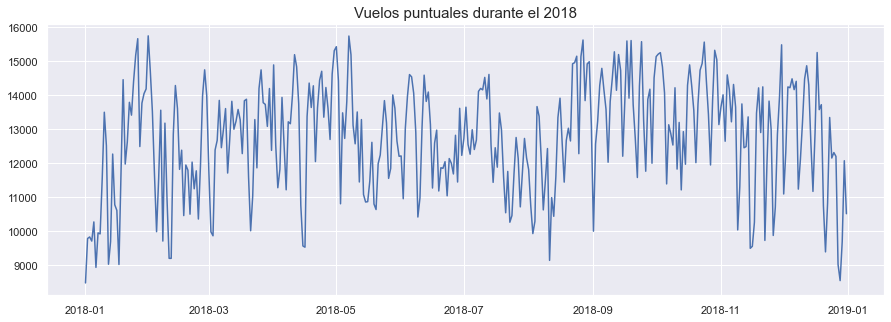

In [30]:
plt.figure(figsize=(15,5))
plt.title('Vuelos puntuales durante el 2018', fontsize = 15)
plt.plot(vuelos)
plt.show()

In [31]:
# Verificamos la estacionariedad

from statsmodels.tsa.stattools import adfuller
test_result = adfuller(vuelos['Cantidad'])

In [32]:
#H0: No es estacionaria
#H1: Es estacionaria

def adfuller_test(vuelos):
    result = adfuller(vuelos) # Esto nos devuelve un array con los resultados
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print('El valor de p es menor a 0.05, lo que significa que podemos rechazar la hipótesis nula H0. Podemos concluir que los datos no tienen raíz unitaria y son estacionarios.')
    else:
        print('Evidencia débil contra la hipótesis nula, lo cual significa que la serie de tiempo tiene una raíz unitaria que indica que no es estacionaria.')

In [33]:
adfuller_test(vuelos['Cantidad'])

ADF Test Statistic : -4.316369591104898
p-value : 0.0004160946084496952
#Lags Used : 14
Number of Observations Used : 350
El valor de p es menor a 0.05, lo que significa que podemos rechazar la hipótesis nula H0. Podemos concluir que los datos no tienen raíz unitaria y son estacionarios.


### Correlograma

In [34]:
import statsmodels as sm
from statsmodels.graphics import tsaplots 

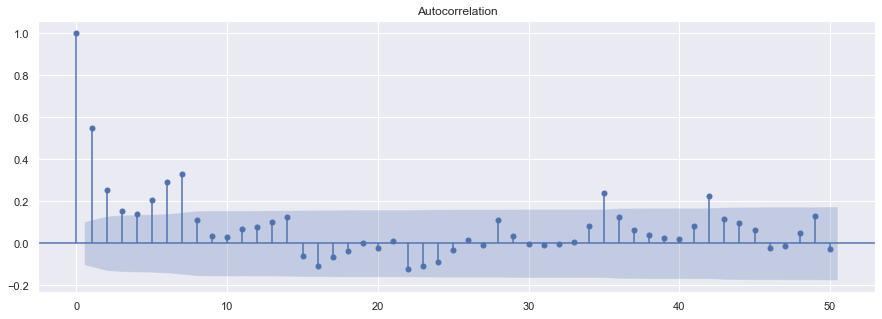

In [37]:
# Gráfica una sola autocorrelación
fig, ax = plt.subplots(figsize=(15,5))
fig = sm.graphics.tsaplots.plot_acf(vuelos['Cantidad'], lags=50, ax=ax)


### Usamos ARIMA

In [38]:
from statsmodels.tsa.arima.model import ARIMA

In [39]:
# Para datos no estacionales

# En parámetro order debemos especificar p, d y q

model = ARIMA(vuelos['Cantidad'],order=(1,1,1))
# order lo que hace es tomar los valores de p, d y q
# p: número de términos autoregresivos, será 1 cuando el gráfico de autocorrelación empieza a disminuir
# d: número de diferencias no estacionales.
# q: número de términos de media móvil, será 1 cuando el grafico de autocorrelacion parcial es sinuoso

model_fit=model.fit()

c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertib

In [40]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Cantidad   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3148.294
Date:                Thu, 27 Oct 2022   AIC                           6302.589
Time:                        18:08:02   BIC                           6314.280
Sample:                    01-01-2018   HQIC                          6307.236
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4815      0.063      7.639      0.000       0.358       0.605
ma.L1         -0.9153      0.029    -31.814      0.000      -0.972      -0.859
sigma2      2.056e+06   1.83e+05     11.244      0.000     1.7e+06    2.41e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.35   Jarque-Bera (JB):                10.70
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.40
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

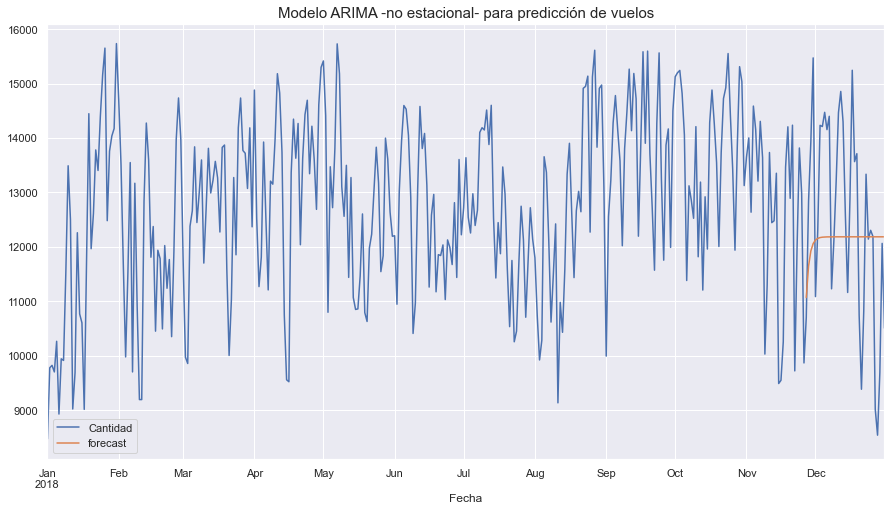

In [46]:
vuelos['forecast']=model_fit.predict(start = 330, end = 365, dynamic = True)
# start: fecha de inicio
# end: fecha de fin
# dynamic: True para que se ajuste a los datos nuevos
vuelos[['Cantidad','forecast']].plot(figsize=(15,8))
plt.title('Modelo ARIMA -no estacional- para predicción de vuelos', fontsize = 15)
plt.show()

### Usamos ARIMAX

In [47]:
# import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
# En el parámetro seasonal_orden debemos indicar = p estacional, d estacional, q estacional y periodicidad estacional

model=SARIMAX(vuelos['Cantidad'],order=(1, 1, 1),seasonal_order=(1,1,1,12))

results=model.fit()

c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Cantidad   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3066.776
Date:                            Thu, 27 Oct 2022   AIC                           6143.551
Time:                                    18:13:11   BIC                           6162.870
Sample:                                01-01-2018   HQIC                          6151.239
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4297      0.073      5.923      0.000       0.288       0.572
ma.L1         -0.8723      0.040    -21.576      0.000      -0.952      -0.793
ar.S.L12       0.0489      0.069      0.712      0.477      -0.086       0.184
ma.S.L12      -0.9872      0.210     -4.701      0.000      -1.399      -0.576
sigma2      1.947e+06   3.63e+05      5.360      0.000    1.24e+06    2.66e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.96   Jarque-Bera (JB):                17.28
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.54
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Fecha'>

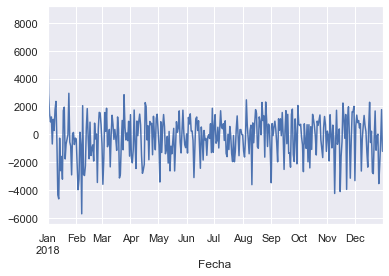

In [50]:
results.resid.plot()

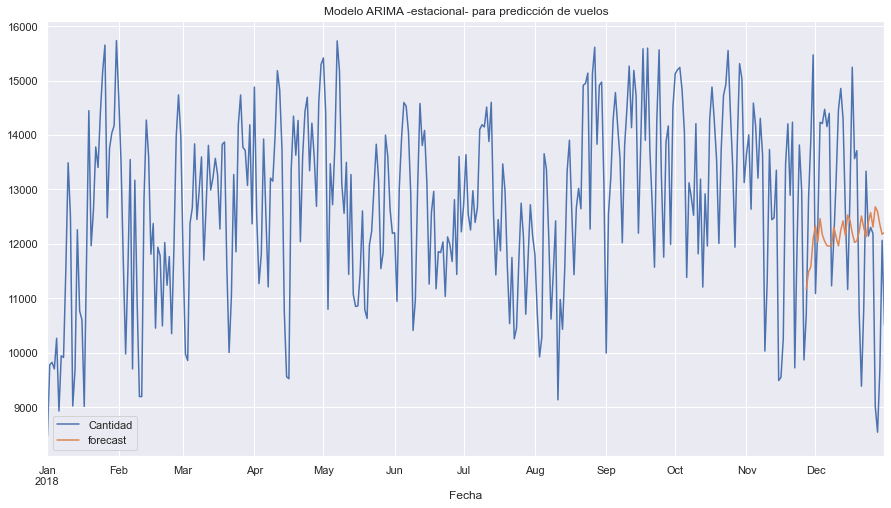

In [52]:
vuelos['forecast']=results.predict(start=330,end=365,dynamic=True) # start: fecha de inicio, end: fecha de fin, dynamic: True para que se ajuste a los datos nuevos
vuelos[['Cantidad','forecast']].plot(figsize=(15,8))
plt.title('Modelo ARIMA -estacional- para predicción de vuelos')
plt.show()

In [57]:
from pandas.tseries.offsets import DateOffset

future_dates = [vuelos.index[-1]+ DateOffset(days=x)for x in range(0,35)] # 3 años = 36 meses
# future_dates, es una lista de fechas que se irán agregando a la fecha final del dataset

In [58]:
future_datest_df = pd.DataFrame(index=future_dates[1:],columns=vuelos.columns)
# future_datest_df, es un dataframe con las fechas de la lista future_dates y las columnas del dataset

In [60]:
future_df = pd.concat([vuelos,future_datest_df]) # Concatenamos los dos dataframes

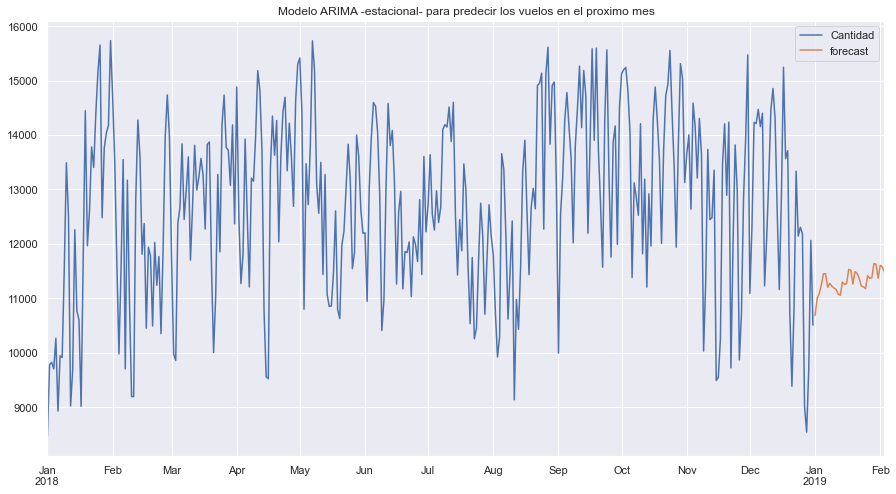

In [61]:
future_df['forecast'] = results.predict(start = 365, end = 400, dynamic= True)  
future_df[['Cantidad', 'forecast']].plot(figsize=(15, 8)) 
plt.title('Modelo ARIMA -estacional- para predecir los vuelos en el proximo mes')
plt.show()